In [5]:
from collections import Counter
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import plotly
from plotly import tools
from plotly.offline import iplot
from plotly.graph_objs import Scatter, Layout, Bar, Histogram
plotly.offline.init_notebook_mode(connected=True)

In [10]:
stops = pd.read_csv('../../data/stops.csv', parse_dates=['date'])
df = pd.read_hdf('../../data/cleaned_dataset_utf.h5',key='data')

In [21]:
df = df.set_index('date').drop(columns =['index'])

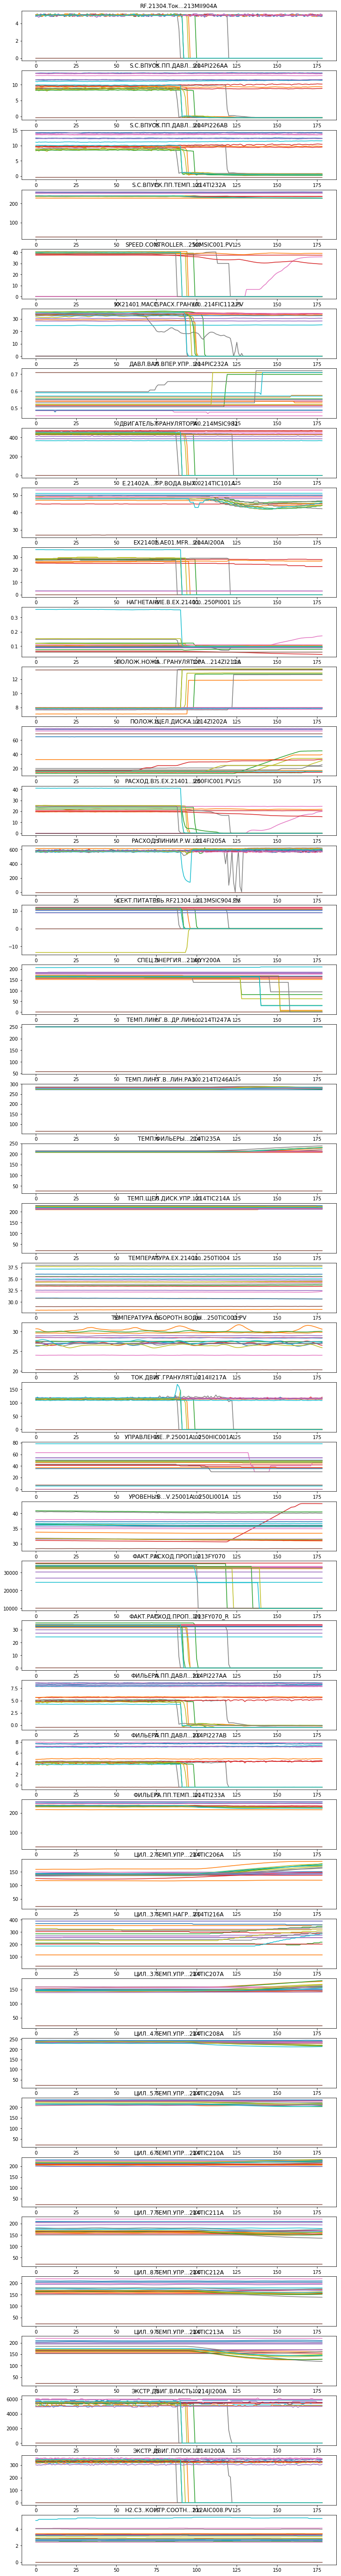

In [48]:
STOP_MARGIN = 15

_,axes = plt.subplots(nrows=len(df.columns), figsize=(12,100))
for ax,col in zip(axes, df.columns):
    for stop_date in stops[stops.type=='stop'].date:
        mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
        ax.plot(df[col][mask].ravel(), label=stop_date)
        ax.set_title(col)
#     ax.legend()

In [66]:
df.columns

Index(['RF.21304.Ток...213MII904A', 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
       'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB', 'S.C.ВПУСК.ПП.ТЕМП...214TI232A',
       'SPEED.CONTROLLER...250MSIC001.PV',
       'XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV',
       'ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A', 'ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981',
       'Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A', 'ЕХ21401.АЕ01.MFR...214AI200A',
       'НАГНЕТАНИЕ.В.EX.21401...250PI001',
       'ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A', 'ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A',
       'РАСХОД.В....EX.21401...250FIC001.PV', 'РАСХОД.ЛИНИИ.P.W...214FI205A',
       'СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV', 'СПЕЦ.ЭНЕРГИЯ...214JYY200A',
       'ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A',
       'ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A', 'ТЕМП.ФИЛЬЕРЫ...214TI235A',
       'ТЕМП.ЩЕЛ.ДИСК.УПР...214TIC214A', 'ТЕМПЕРАТУРА.EX.21401...250TI004',
       'ТЕМПЕРАТУРА.ОБОРОТН.ВОДЫ...250TIC003.PV',
       'ТОК.ДВИГ.ГРАНУЛЯТ...214II217A', 'УПРАВЛЕНИЕ..P.25001A...250HIC001A',
       'УР

In [8]:
df[col]

date
2017-01-11 00:00:00     9.510000
2017-01-11 00:00:10     9.670000
2017-01-11 00:00:20     9.690000
2017-01-11 00:00:30     9.670000
2017-01-11 00:00:40     9.670000
2017-01-11 00:00:50     9.719999
2017-01-11 00:01:00     9.690000
2017-01-11 00:01:10     9.710000
2017-01-11 00:01:20     9.670000
2017-01-11 00:01:30     9.639999
2017-01-11 00:01:40     9.620000
2017-01-11 00:01:50     9.610000
2017-01-11 00:02:00     9.599999
2017-01-11 00:02:10     9.580000
2017-01-11 00:02:20     9.580000
2017-01-11 00:02:30     9.550000
2017-01-11 00:02:40     9.570000
2017-01-11 00:02:50     9.540000
2017-01-11 00:03:00     9.540000
2017-01-11 00:03:10     9.570000
2017-01-11 00:03:20     9.599999
2017-01-11 00:03:30     9.620000
2017-01-11 00:03:40     9.650000
2017-01-11 00:03:50     9.610000
2017-01-11 00:04:00     9.620000
2017-01-11 00:04:10     9.670000
2017-01-11 00:04:20     9.690000
2017-01-11 00:04:30     9.690000
2017-01-11 00:04:40     9.670000
2017-01-11 00:04:50     9.660000
     

In [43]:
STOP_MARGIN = 15

good_stops = []
for stop_date in stops[stops.type=='stop'].date:
    times = []
    for col in ['RF.21304.Ток...213MII904A', 
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB']:
        try:
            mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                    (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
            delta = np.abs(np.diff(df[col][mask].ravel()))
            if not delta.max()>10*np.mean(delta):
                continue
            times.append(df.index[mask][delta.argmax()])
        except:
            pass
    if len(times)>0:
        good_stops.append(times)


In [57]:
good_stops = list(map(lambda s: pd.Timestamp(sum([t.value for t in s])/3), good_stops))

In [63]:
pd.DataFrame(good_stops, columns=['date']).to_csv('../../data/good_stops.csv')

### good_stops

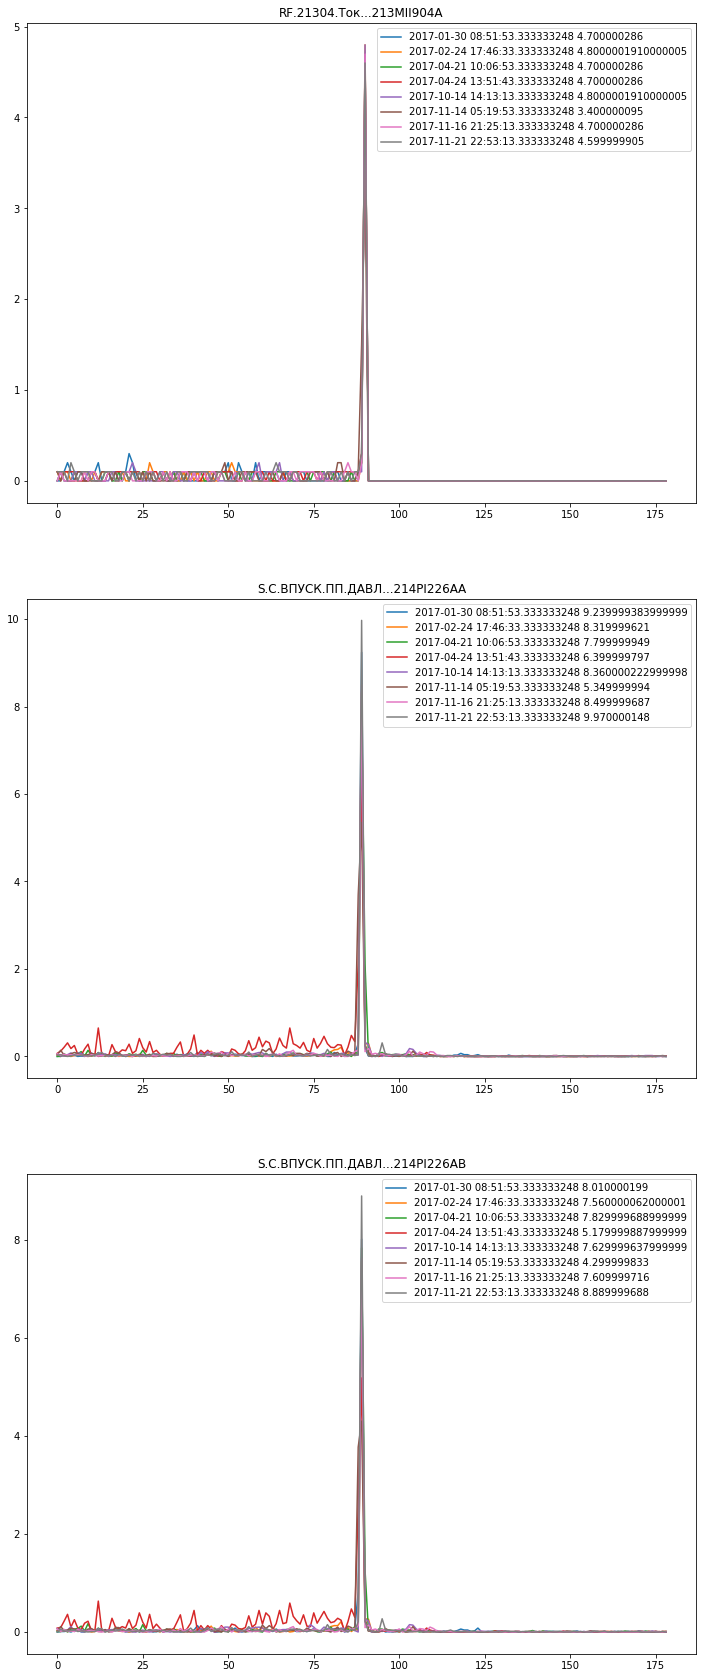

In [58]:
STOP_MARGIN = 15

_,axes = plt.subplots(nrows=3, figsize=(12,30))
for ax,col in zip(axes, ['RF.21304.Ток...213MII904A', 
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB']):
    for stop_date in good_stops:
        try:
            mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                    (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
            delta = np.abs(np.diff(df[col][mask].ravel()))
            if not delta.max()>10*np.mean(delta):
                continue
            ax.plot(delta, label=str(stop_date)+' '+str(delta.max()))
            ax.set_title(col)
            ax.legend()
        except:
            pass

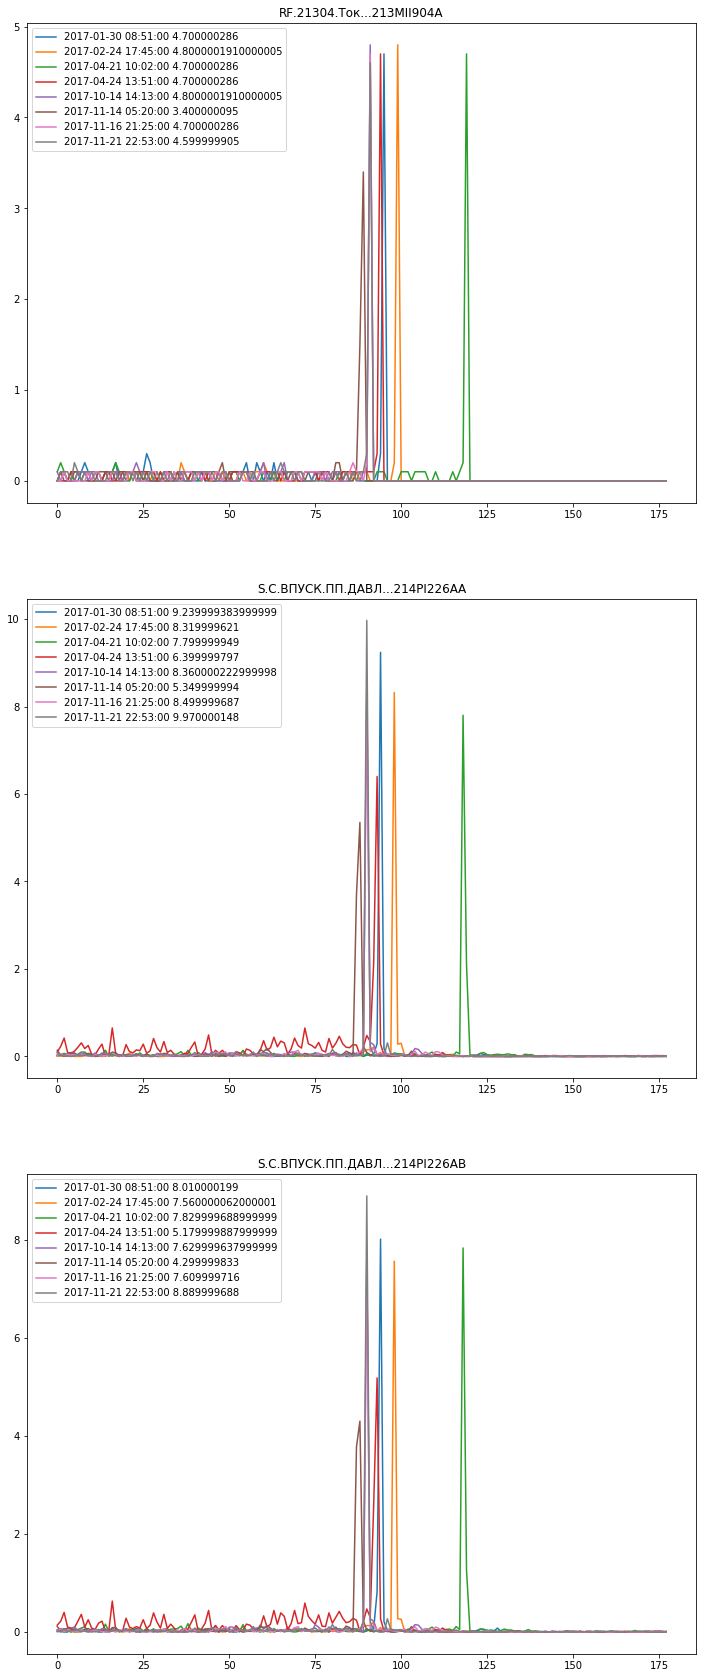

In [39]:
STOP_MARGIN = 15

_,axes = plt.subplots(nrows=3, figsize=(12,30))
for ax,col in zip(axes, ['RF.21304.Ток...213MII904A', 
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
                 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB']):
    for stop_date in stops[stops.type=='stop'].date:
        try:
            mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                    (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
            delta = np.abs(np.diff(df[col][mask].ravel()))
            if not delta.max()>10*np.mean(delta):
                continue
            ax.plot(delta, label=str(stop_date)+' '+str(delta.max()))
            ax.set_title(col)
            ax.legend()
        except:
            pass
#     ax.legend()

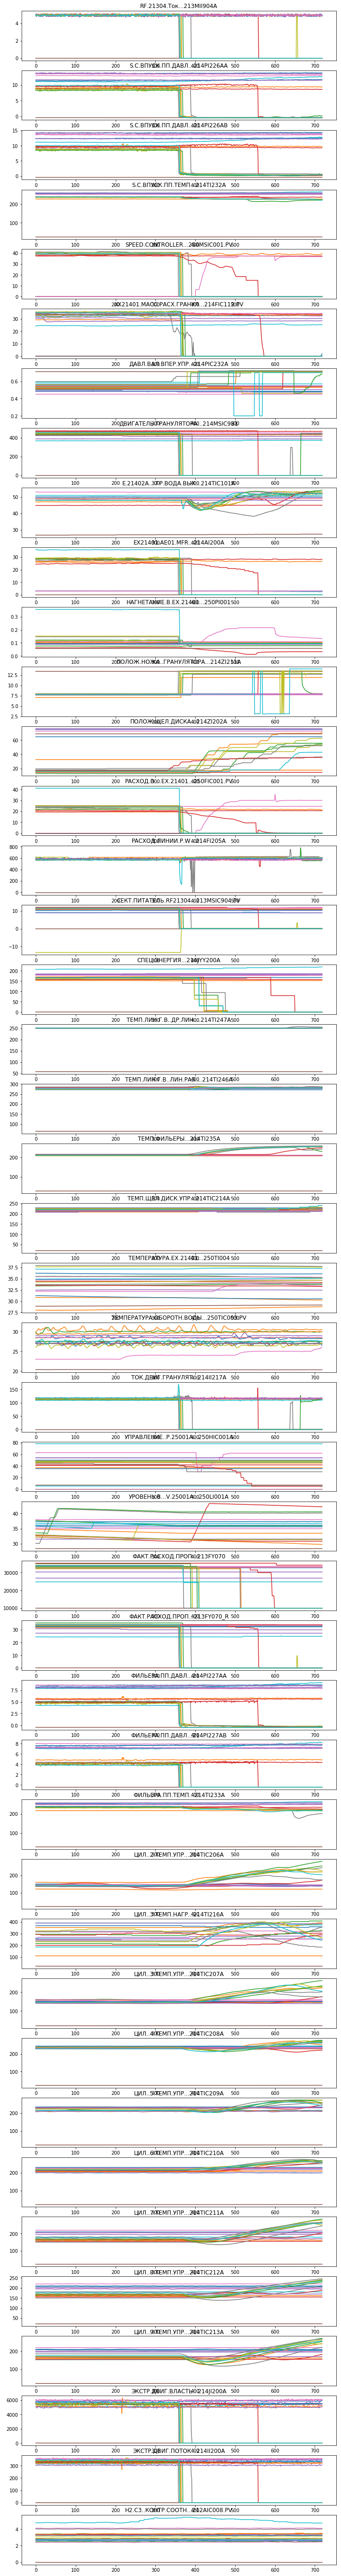

In [49]:
STOP_MARGIN = 60

_,axes = plt.subplots(nrows=len(df.columns), figsize=(12,100))
for ax,col in zip(axes, df.columns):
    for stop_date in stops[stops.type=='stop'].date:
        mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
        ax.plot(df[col][mask].ravel(), label=stop_date)
        ax.set_title(col)
#     ax.legend()

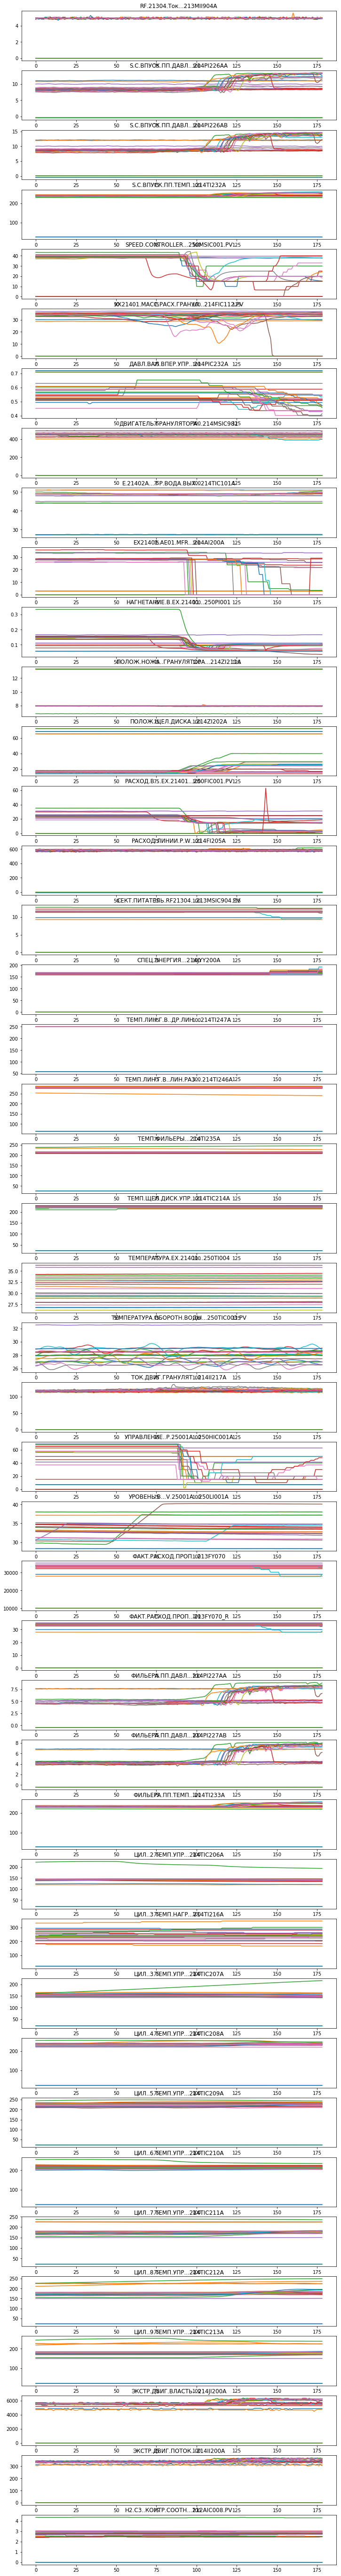

In [67]:
STOP_MARGIN = 15

_,axes = plt.subplots(nrows=len(df.columns), figsize=(12,100))
for ax,col in zip(axes, df.columns):
    for stop_date in stops[stops.type=='vibrosito'].date:
        mask = (df.index < stop_date + timedelta(minutes=STOP_MARGIN)) &\
                (df.index > stop_date - timedelta(minutes=STOP_MARGIN))
        ax.plot(df[col][mask].ravel(), label=stop_date)
        ax.set_title(col)